In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)
print(tfds.__version__)

2.1.0
4.5.2


In [15]:
dataset, info =tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset=dataset['train'].take(4000),dataset['test'].take(1000)

In [16]:
tokenizer = info.features['text'].encoder
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\WX847\\tensorflow_datasets\\imdb_reviews\\subwords8k\\1.0.0',
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    disable_shuf

产生数据

In [17]:
BUFFER_SIZE = 100
BATCH_SIZE = 100
padded_shapes = ([None],()) 

train_dataset = train_dataset.shuffle(BUFFER_SIZE).take(1000)
train_dataset = train_dataset.padded_batch(BATCH_SIZE,padded_shapes=padded_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE,padded_shapes=padded_shapes).take(1000)

In [18]:
vocab_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 8),
    # Bidirectionnal 双向的cell_state，即可以联系上下文，不只是前文影响后文
    # LSTM实现LSTM，8为输出维度
    # return_sequences 当有两个LSTM连接时，需要设置前一个LSTM，这个属性
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8,return_sequences=True)),  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 8)           65480     
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 16)          1088      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 16)                1600      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 68,457
Trainable params: 68,457
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
NUM_EPOCHS=10
history = model.fit(train_dataset, epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 2/10
10/10 [==============================] - 6s 600ms/step - loss: 0.6921 - accuracy: 0.5090 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 3/10
10/10 [==============================] - 6s 584ms/step - loss: 0.6904 - accuracy: 0.5070 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 4/10
10/10 [==============================] - 6s 589ms/step - loss: 0.6852 - accuracy: 0.5230 - val_loss: 0.6917 - val_accuracy: 0.5090
Epoch 5/10
10/10 [==============================] - 6s 589ms/step - loss: 0.6712 - accuracy: 0.6210 - val_loss: 0.6878 - val_accuracy: 0.5320
Epoch 6/10
10/10 [==============================] - 6s 579ms/step - loss: 0.6206 - accuracy: 0.7780 - val_loss: 0.6682 - val_accuracy: 0.5970
Epoch 7/10
10/10 [==============================] - 6s 595ms/step - loss: 0.5004 - accuracy: 0.9070 - val_loss: 0.6326 - val_accuracy: 0.6550
Epoch 8/

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key,'val'+key])
    plt.show()


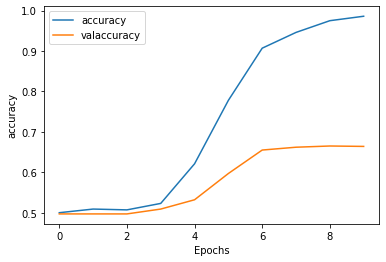

In [29]:
plot_graphs(history,'accuracy')

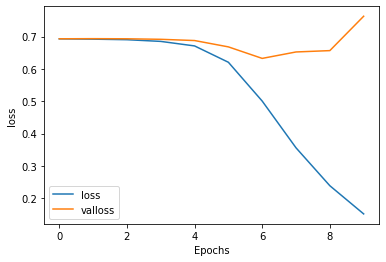

In [30]:
plot_graphs(history,'loss')